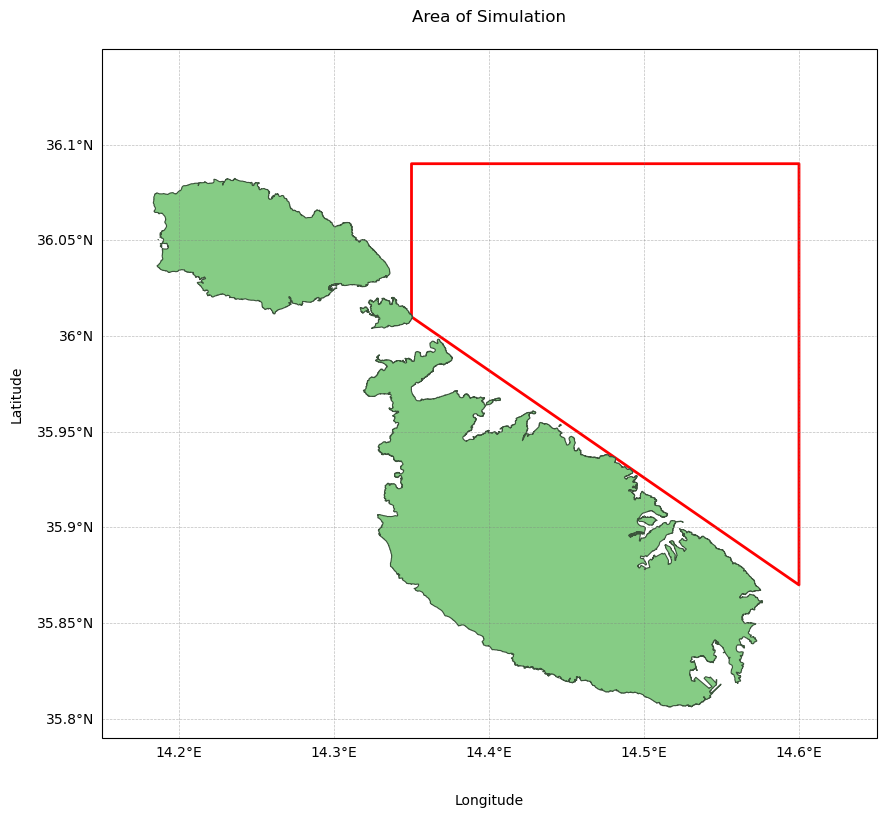

In [1]:
### First Visuslisation for the Article
### Caption: "Area Boundaries for the Simulation"

import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Polygon

# Path to the shapefile
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Define the vertices of a polygon to highlight a specific area on the map
polygon_coordinates = [
    (14.6, 35.87),
    (14.35, 36.01),
    (14.35, 36.09),
    (14.6, 36.09),
    (14.6, 35.87)
]
polygon_shape = Polygon(polygon_coordinates)

# Define the geographic boundaries for plotting
extent = [14.15, 14.65, 35.79, 36.15]

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=2)

# Add the polygon to the map
ax.add_geometries([polygon_shape], ccrs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=2)

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("Area of Simulation", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
 
# Display the plot
plt.show()

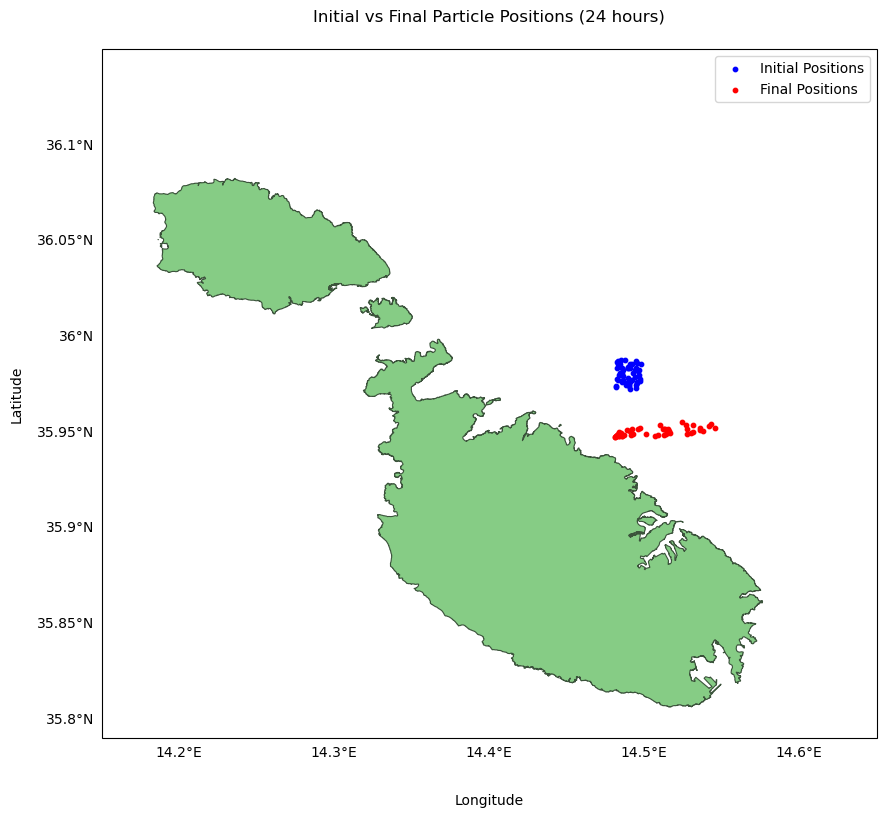

In [2]:
### Second Visuslisation for the Article
### Caption: "Debris Locations Before and After 24 hr Simulation"

import xarray as xr

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Load the predicted particle data
predicted_ds = xr.open_zarr("../Lagrangian_Output/LSTM_predicted_values.zarr")

# Calculate initial and final positions
initial_lons = predicted_ds.lon.isel(obs=0).values  # Initial longitudes
initial_lats = predicted_ds.lat.isel(obs=0).values  # Initial latitudes
final_lons = predicted_ds.lon.isel(obs=-1).values  # Final longitudes
final_lats = predicted_ds.lat.isel(obs=-1).values  # Final latitudes

# Define the geographic boundaries for the plot
extent = [14.15, 14.65, 35.79, 36.15]

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=2)

# Plot the initial positions of the particles on the map
ax.scatter(initial_lons, initial_lats, s=10, c='blue', marker='o', transform=ccrs.PlateCarree(), label='Initial Positions')

# Plot the final positions of the particles on the map
ax.scatter(final_lons, final_lats, s=10, c='red', marker='o', transform=ccrs.PlateCarree(), label='Final Positions')

# Customize the plot appearance
ax.set_title("Initial vs Final Particle Positions (24 hours)", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()